In [1]:
import torch
import torchvision
from torchvision import datasets, transforms 
from sklearn.metrics import classification_report
from torchvision import datasets, models, transforms

%run setup.ipynb

# Adding weight decay etc. to the training (after augs)

## Weight decay 0.0001 finetuning (model aug 1, unfreezing layer 4, 30 epochs)

In [3]:
model_finewd0001_aug1, model_finewd0001_aug1_info = load_function("aug1Model_50.tar", model_key="aug", info_key="aug_info")

unfreeze_layer4(model_finewd0001_aug1)
epochs=30
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model_finewd0001_aug1.parameters()), lr=0.001, weight_decay=0.0001)


In [4]:
model_finewd0001_aug1, model_finewd0001_aug1_info = train_model(model_finewd0001_aug1, optimizer, num_epoch=epochs, train=dataloader_train_aug1)


Epoch 1/30
----------
Train Loss: 0.2474 Acc: 0.9150
Val Loss: 0.1014 Acc: 0.9615
Epoch time 1m 7s
----------

Epoch 2/30
----------
Train Loss: 0.1316 Acc: 0.9581
Val Loss: 0.0963 Acc: 0.9519
Epoch time 1m 29s
----------

Epoch 3/30
----------
Train Loss: 0.1017 Acc: 0.9677
Val Loss: 0.0469 Acc: 0.9904
Epoch time 1m 15s
----------

Epoch 4/30
----------
Train Loss: 0.1234 Acc: 0.9593
Val Loss: 0.0592 Acc: 0.9904
Epoch time 1m 15s
----------

Epoch 5/30
----------
Train Loss: 0.0877 Acc: 0.9713
Val Loss: 0.0962 Acc: 0.9712
Epoch time 1m 15s
----------

Epoch 6/30
----------
Train Loss: 0.1139 Acc: 0.9605
Val Loss: 0.0547 Acc: 0.9808
Epoch time 1m 15s
----------

Epoch 7/30
----------
Train Loss: 0.0618 Acc: 0.9844
Val Loss: 0.0385 Acc: 0.9808
Epoch time 0m 49s
----------

Epoch 8/30
----------
Train Loss: 0.0621 Acc: 0.9772
Val Loss: 0.0913 Acc: 0.9808
Epoch time 0m 44s
----------

Epoch 9/30
----------
Train Loss: 0.0372 Acc: 0.9880
Val Loss: 0.0321 Acc: 0.9904
Epoch time 0m 46s
-----

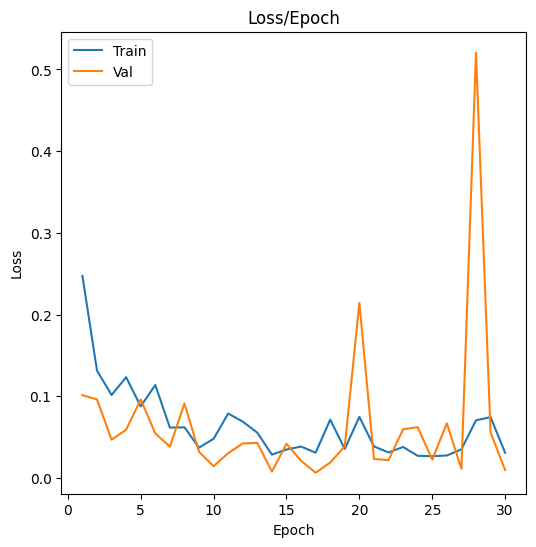

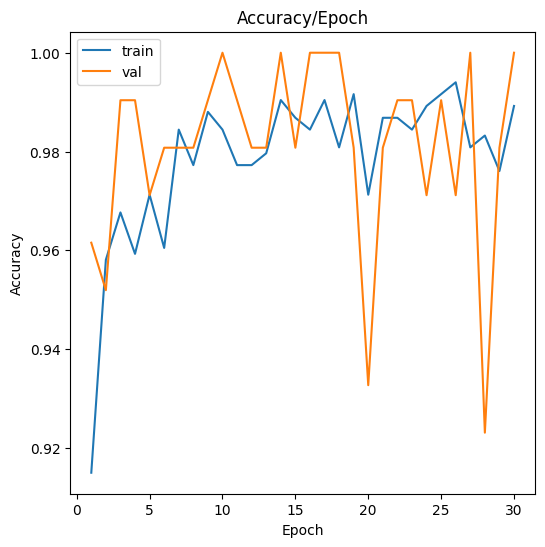

Lowest loss was 0.0066 at epoch 17
Highest accuracy was 1.0000 at epoch 10
Number of epochs run  30
Batch size was  16


In [5]:
plot_loss(model_finewd0001_aug1_info["train_loss"], model_finewd0001_aug1_info["val_loss"])
plot_accuracies(model_finewd0001_aug1_info["train_acc"], model_finewd0001_aug1_info["val_acc"], ["train", "val"])
print_stats(model_finewd0001_aug1_info)

In [8]:
truel, model_finewd0001_aug1_predl = labels_and_predictions(dataloader_test, model_finewd0001_aug1, device)
testacc_model_finewd0001_aug1 = (np.sum(model_finewd0001_aug1_predl==truel)/model_finewd0001_aug1_predl.size * 100)
print("Accuracy", testacc_model_finewd0001_aug1)
print(classification_report(truel, model_finewd0001_aug1_predl, target_names=class_labels))

Accuracy 98.09523809523809
              precision    recall  f1-score   support

     blueTit       1.00      1.00      1.00        15
   chaffinch       0.94      1.00      0.97        15
     coalTit       1.00      1.00      1.00        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       1.00      0.93      0.97        15
       robin       0.93      0.93      0.93        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

